<a href="https://colab.research.google.com/github/willycoy/MYSQL/blob/main/Mysql_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 53.3 MB/s eta 0:00:00


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn as sk
import mysql.connector

In [12]:

def connect_to_database():
    return mysql.connector.connect(
        host="bzkzrln2cgboyexch7vn-mysql.services.clever-cloud.com",
        database="bzkzrln2cgboyexch7vn",
        user="uhxh2pfxl0zhwfi9",
        password="jKuQ2qNctsG0lfkzkW10"
    )


In [13]:
def run_query(query):
    db = connect_to_database()
    cursor = db.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()
    db.close()
    return pd.DataFrame(result)



grafico 1

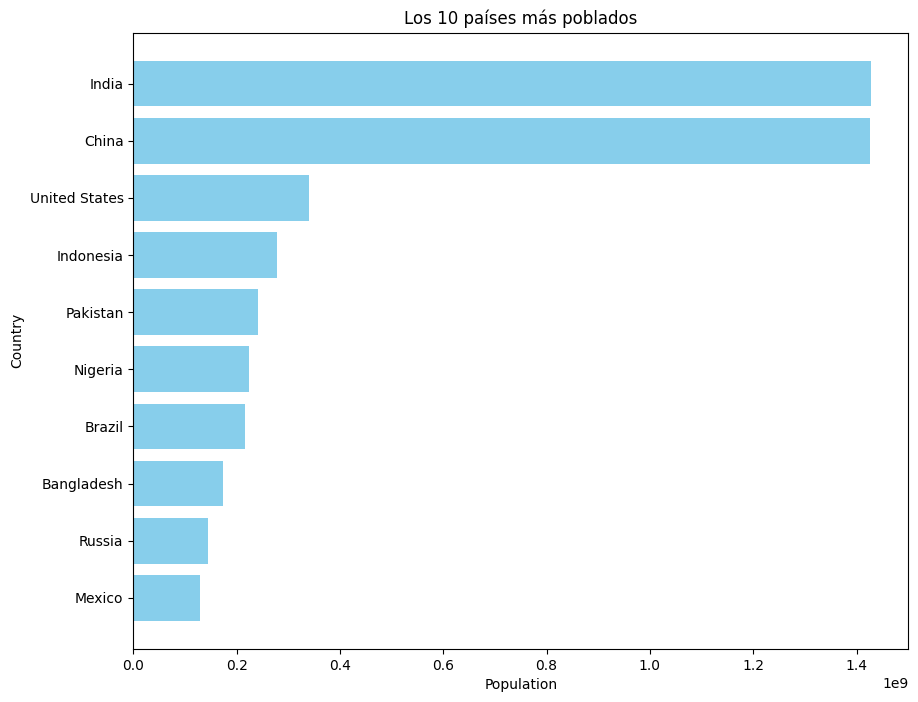

In [16]:
query1 = """
SELECT Country, Population
FROM population
ORDER BY Population DESC
LIMIT 10;
"""

df1 = run_query(query1)
plt.figure(figsize=(10, 8))
plt.barh(df1[0], df1[1], color='skyblue')
plt.xlabel('Population')
plt.ylabel('Country')
plt.title('Los 10 países más poblados')
plt.gca().invert_yaxis()
plt.show()



# Conclusión 2: La alta población puede estar correlacionada con la economía y el desarrollo tecnológico de un país.

# ### **Gráfico 2: Densidad de población frente a superficie terrestre de los 30 países principales


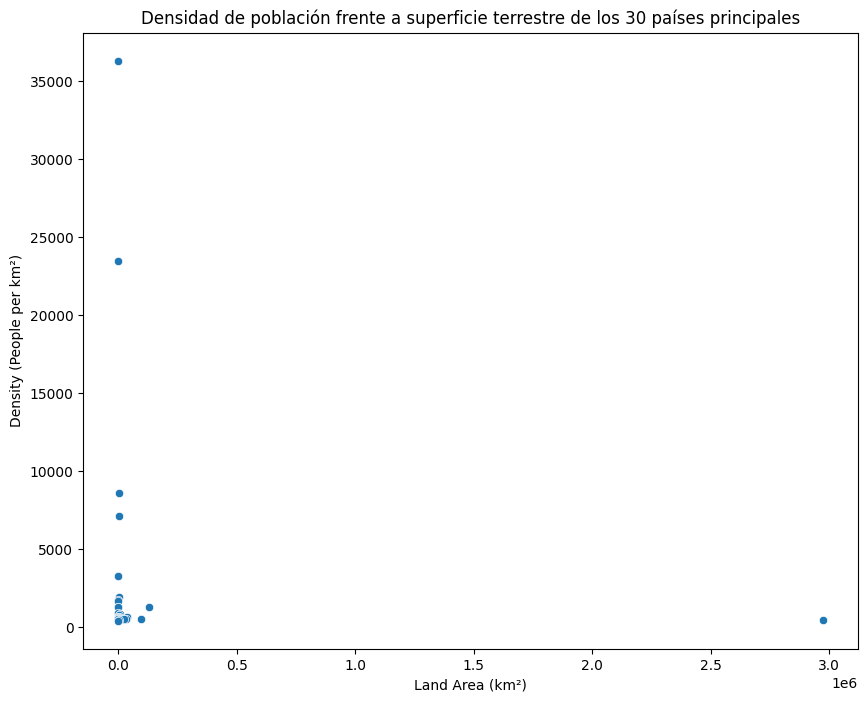

In [19]:
query2 = """
SELECT Country, Population / LandArea AS Density, LandArea
FROM population
WHERE LandArea > 0
ORDER BY (Population / LandArea) DESC
LIMIT 30;
"""
df2 = run_query(query2)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df2[2], y=df2[1])
plt.xlabel('Land Area (km²)')
plt.ylabel('Density (People per km²)')
plt.title('Densidad de población frente a superficie terrestre de los 30 países principales')
plt.show()



Gráfico 3: Análisis de lasm tasas de fertilidad por pais

In [21]:
def run_query(query):
    db = connect_to_database()
    cursor = db.cursor()
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()
    db.close()
    return pd.DataFrame(result, columns=['Fertility Rate'])



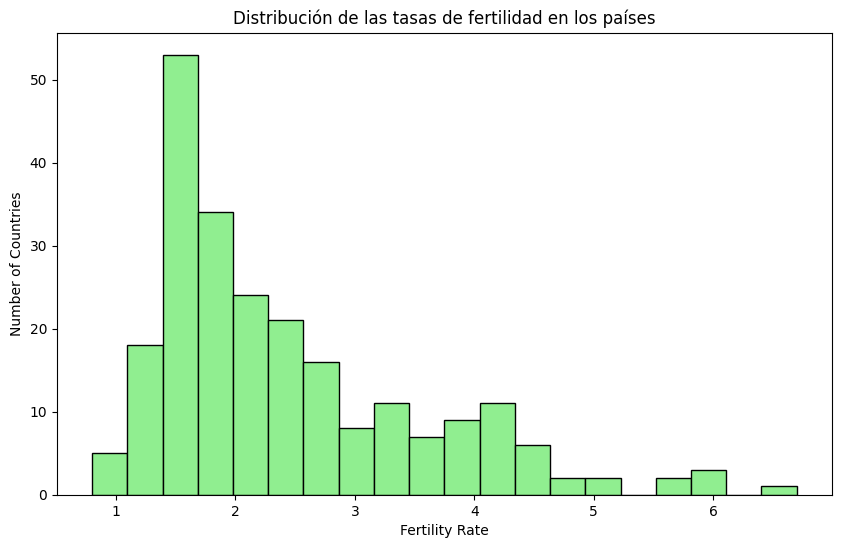

In [25]:
query = """
SELECT FertRate FROM population WHERE FertRate IS NOT NULL;
"""

# Histograma de Tasas de Fertilidad
df = run_query(query)


plt.figure(figsize=(10, 6))
plt.hist(df['Fertility Rate'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Fertility Rate')
plt.ylabel('Number of Countries')
plt.title('Distribución de las tasas de fertilidad en los países')
plt.show()